# Reformatting HT397B1-S1H2Fs4U1Bp1 data

In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from anndata import AnnData
import matplotlib
import matplotlib.pyplot as plt

1. Preparing CytoSpace (https://github.com/digitalcytometry/cytospace) input files (Rearrange single-cell files into the formats needed by cytospace)

In [2]:
# reading single cell data
adata = sc.read_h5ad(
    '/diskmnt/Projects/Users/estorrs/summer-researchers/data/HT397B1/single-cell/HT397B1-S1H4A4Y1N1_snRNA.h5ad')
adata

AnnData object with n_obs × n_vars = 2470 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'rho', 'percent.mt', 'percent.rb', 'doublet_score', 'predicted_doublet', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'Sample', 'Patient_ID', 'Data_type', 'is_cell', 'excluded_reason', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'log10

In [3]:
# checking obs object
adata.obs

orig.ident nCount_RNA  \
HT397B1-S1H4A4Y1N1_AAACATGCAAGTCGCT-1  HT397B1-S1H4A4Y1N1       2382   
HT397B1-S1H4A4Y1N1_AAACATGCACTAAGTT-1  HT397B1-S1H4A4Y1N1      14734   
HT397B1-S1H4A4Y1N1_AAACCAACAATTAGCT-1  HT397B1-S1H4A4Y1N1       1565   
HT397B1-S1H4A4Y1N1_AAACCAACACACAATT-1  HT397B1-S1H4A4Y1N1       4051   
HT397B1-S1H4A4Y1N1_AAACCAACAGGAACAT-1  HT397B1-S1H4A4Y1N1        810   
...                                                   ...        ...   
HT397B1-S1H4A4Y1N1_TTTGTGAAGTCATTTC-1  HT397B1-S1H4A4Y1N1       1273   
HT397B1-S1H4A4Y1N1_TTTGTGAAGTTAGACC-1  HT397B1-S1H4A4Y1N1       2590   
HT397B1-S1H4A4Y1N1_TTTGTGGCAAGCGATG-1  HT397B1-S1H4A4Y1N1       2311   
HT397B1-S1H4A4Y1N1_TTTGTGGCATGCTTAG-1  HT397B1-S1H4A4Y1N1       5205   
HT397B1-S1H4A4Y1N1_TTTGTTGGTTAGGATT-1  HT397B1-S1H4A4Y1N1       2779   

                                      nFeature_RNA    rho          percent.mt  \
HT397B1-S1H4A4Y1N1_AAACATGCAAGTCGCT-1         1547  0.043   0.167926112510495   
HT397B1-S1H4A4Y1N1_AAACATGCACTAAGTT-1         4799  0.043    6.44767205103841   
HT397B1-S1H4A4Y1N1_AAACCAACAATTAGCT-1         1018  0.043   0.255591054313099   
HT397B1-S1H4A4Y1N1_AAACCAACACACAATT-1         2058  0.043                   0   
HT397B1-S1H4A4Y1N1_AAACCAACAGGAACAT-1          609  0.043    2.22222222222222   
...                                            ...    ...                 ...   
HT397B1-S1H4A4Y1N1_TTTGTGAAGTCATTTC-1          833  0.043    6.83424980361351   
HT397B1-S1H4A4Y1N1_TTTGTGAAGTTAGACC-1         1468  0.043  0.0772200772200772   
HT397B1-S1H4A4Y1N1_TTTGTGGCAAGCGATG-1         1409  0.043   0.043271311120727   
HT397B1-S1H4A4Y1N1_TTTGTGGCATGCTTAG-1         2597  0.043  0.0384245917387128   
HT397B1-S1H4A4Y1N1_TTTGTTGGTTAGGATT-1         1617  0.043    6.58510255487585   

                                      percent.rb doublet_score  \
HT397B1-S1H4A4Y1N1_AAACATGCAAGTCGCT-1         NA            NA   
HT397B1-S1H4A4Y1N1_AAACATGCACTAAGTT-1         NA            NA   
HT397B1-S1H4A4Y1N1_AAACCAACAATTAGCT-1         NA            NA   
HT397B1-S1H4A4Y1N1_AAACCAACACACAATT-1         NA            NA   
HT397B1-S1H4A4Y1N1_AAACCAACAGGAACAT-1         NA            NA   
...                                          ...           ...   
HT397B1-S1H4A4Y1N1_TTTGTGAAGTCATTTC-1         NA            NA   
HT397B1-S1H4A4Y1N1_TTTGTGAAGTTAGACC-1         NA            NA   
HT397B1-S1H4A4Y1N1_TTTGTGGCAAGCGATG-1         NA            NA   
HT397B1-S1H4A4Y1N1_TTTGTGGCATGCTTAG-1         NA            NA   
HT397B1-S1H4A4Y1N1_TTTGTTGGTTAGGATT-1         NA            NA   

                                      predicted_doublet               S.Score  \
HT397B1-S1H4A4Y1N1_AAACATGCAAGTCGCT-1             FALSE   -0.0160311925042884   
HT397B1-S1H4A4Y1N1_AAACATGCACTAAGTT-1             FALSE   0.00274153014943647   
HT397B1-S1H4A4Y1N1_AAACCAACAATTAGCT-1             FALSE    0.0416233219249276   
HT397B1-S1H4A4Y1N1_AAACCAACACACAATT-1             FALSE   -0.0399782464797282   
HT397B1-S1H4A4Y1N1_AAACCAACAGGAACAT-1             FALSE    -0.030288634283656   
...                                                 ...                   ...   
HT397B1-S1H4A4Y1N1_TTTGTGAAGTCATTTC-1             FALSE     0.104932627929803   
HT397B1-S1H4A4Y1N1_TTTGTGAAGTTAGACC-1             FALSE  -0.00572281417154524   
HT397B1-S1H4A4Y1N1_TTTGTGGCAAGCGATG-1             FALSE    0.0248176126792183   
HT397B1-S1H4A4Y1N1_TTTGTGGCATGCTTAG-1             FALSE  -0.00733771591795229   
HT397B1-S1H4A4Y1N1_TTTGTTGGTTAGGATT-1             FALSE     0.012133204688933   

                                                 G2M.Score  ...  \
HT397B1-S1H4A4Y1N1_AAACATGCAAGTCGCT-1  -0.0377388137833607  ...   
HT397B1-S1H4A4Y1N1_AAACATGCACTAAGTT-1  -0.0908862301594304  ...   
HT397B1-S1H4A4Y1N1_AAACCAACAATTAGCT-1  -0.0187921286720455  ...   
HT397B1-S1H4A4Y1N1_AAACCAACACACAATT-1  -0.0469690477942794  ...   
HT397B1-S1H4A4Y1N1_AAACCAACAGGAACAT-1   0.0109360008029343  ...   
...                                      

In [4]:
# converting the cell type label file to text format to be used as the input file for CytoSpace
celltype = adata.obs[['cell_type']]
celltype.to_csv(
    '/diskmnt/Projects/Users/winnie/data/subclone/analysis/HT397B1-S1H2Fs4U1Bp1/sc_celltype.txt', 
    sep = '\t', quoting = 3)

In [5]:
# reset index
adata.obs.reset_index(drop = False, inplace = True)

# the input file: A scRNA-seq gene expression file should have genes as rows and cells as columns
# transpose the index column into cell IDs row
adata.obs[['index']].T                                # 1 rows × 2470 columns

0     \
index  HT397B1-S1H4A4Y1N1_AAACATGCAAGTCGCT-1   

                                        1     \
index  HT397B1-S1H4A4Y1N1_AAACATGCACTAAGTT-1   

                                        2     \
index  HT397B1-S1H4A4Y1N1_AAACCAACAATTAGCT-1   

                                        3     \
index  HT397B1-S1H4A4Y1N1_AAACCAACACACAATT-1   

                                        4     \
index  HT397B1-S1H4A4Y1N1_AAACCAACAGGAACAT-1   

                                        5     \
index  HT397B1-S1H4A4Y1N1_AAACCGAAGCTGCACA-1   

                                        6     \
index  HT397B1-S1H4A4Y1N1_AAACCGGCACAACCTA-1   

                                        7     \
index  HT397B1-S1H4A4Y1N1_AAACCGGCACAAGCCT-1   

                                        8     \
index  HT397B1-S1H4A4Y1N1_AAACGCGCAGGCCAAA-1   

                                        9     ...  \
index  HT397B1-S1H4A4Y1N1_AAAGCACCAAGGTACG-1  ...   

                                        2460  \
index  HT397B1-S1H4A4Y1N1_TTTGTCTAGCACAGGG-1   

                                        2461  \
index  HT397B1-S1H4A4Y1N1_TTTGTCTAGGGACCTC-1   

                                        2462  \
index  HT397B1-S1H4A4Y1N1_TTTGTGAAGCATGCAT-1   

                                        2463  \
index  HT397B1-S1H4A4Y1N1_TTTGTGAAGCGCCTTT-1   

                                        2464  \
index  HT397B1-S1H4A4Y1N1_TTTGTGAAGGCTCATG-1   

                                        2465  \
index  HT397B1-S1H4A4Y1N1_TTTGTGAAGTCATTTC-1   

                                        2466  \
index  HT397B1-S1H4A4Y1N1_TTTGTGAAGTTAGACC-1   

                                        2467  \
index  HT397B1-S1H4A4Y1N1_TTTGTGGCAAGCGATG-1   

                                        2468  \
index  HT397B1-S1H4A4Y1N1_TTTGTGGCATGCTTAG-1   

                                        2469  
index  HT397B1-S1H4A4Y1N1_TTTGTTGGTTAGGATT-1  

[1 rows x 2470 columns]

In [6]:
# checking variable object
adata.var

features
MIR1302-2HG  MIR1302-2HG
FAM138A          FAM138A
OR4F5              OR4F5
AL627309.1    AL627309.1
AL627309.3    AL627309.3
...                  ...
AC141272.1    AC141272.1
AC023491.2    AC023491.2
AC007325.1    AC007325.1
AC007325.4    AC007325.4
AC007325.2    AC007325.2

[36601 rows x 1 columns]

In [7]:
# reset index
adata.var.reset_index(drop = False, inplace = True)

# get the gene names column
adata.var[['features']]                               # 36601 rows × 1 columns

features
0      MIR1302-2HG
1          FAM138A
2            OR4F5
3       AL627309.1
4       AL627309.3
...            ...
36596   AC141272.1
36597   AC023491.2
36598   AC007325.1
36599   AC007325.4
36600   AC007325.2

[36601 rows x 1 columns]

In [8]:
# checking X object
adata.X                                               # 2470 rows × 36601 columns

<2470x36601 sparse matrix of type '<class 'numpy.float64'>'
	with 5351962 stored elements in Compressed Sparse Row format>

In [9]:
# transpose the raw counts in adata.X
expression = adata.raw.X.T.toarray()
expression

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
df_exp = pd.DataFrame(expression)
df_exp

0     1     2     3     4     5     6     7     8     9     ...  2460  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
36596   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
36597   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
36598   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
36599   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
36600   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       2461  2462  2463  2464  2465  2466  2467  2468  2469  
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
36596   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
36597   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
36598   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
36599   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
36600   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[36601 rows x 2470 columns]

In [11]:
# concatenate cell IDs and the original gene expression dataframe
df_exp1 = pd.concat([adata.obs[['index']].T, df_exp], axis = 0)
df_exp1

0     \
index  HT397B1-S1H4A4Y1N1_AAACATGCAAGTCGCT-1   
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
...                                      ...   
36596                                    0.0   
36597                                    0.0   
36598                                    0.0   
36599                                    0.0   
36600                                    0.0   

                                        1     \
index  HT397B1-S1H4A4Y1N1_AAACATGCACTAAGTT-1   
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
...                                      ...   
36596                                    0.0   
36597                                    0.0   
36598                                    0.0   
36599                                    0.0   
36600                                    0.0   

                                        2     \
index  HT397B1-S1H4A4Y1N1_AAACCAACAATTAGCT-1   
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
...                                      ...   
36596                                    0.0   
36597                                    0.0   
36598                                    0.0   
36599                                    0.0   
36600                                    0.0   

                                        3     \
index  HT397B1-S1H4A4Y1N1_AAACCAACACACAATT-1   
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
...                                      ...   
36596                                    0.0   
36597                                    0.0   
36598                                    0.0   
36599                                    0.0   
36600                                    0.0   

                                        4     \
index  HT397B1-S1H4A4Y1N1_AAACCAACAGGAACAT-1   
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
...                                      ...   
36596                                    0.0   
36597                                    0.0   
36598                                    0.0   
36599                                    0.0   
36600                                    0.0   

                                        5     \
index  HT397B1-S1H4A4Y1N1_AAACCGAAGCTGCACA-1   
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
...                                      ...   
36596                                    0.0   
36597                                    0.0   
36598                                    0.0   
36599                                    0.0   
36600                                    0.0   

                                        6     \
index  HT397B1-S1H4A4Y1N1_AAACCGGCACAACCTA-1   
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
...                                      ...   
36596                                    0.0   
36597                                    0.0   
36598                                    0.0   
36599                                    0.0   
36600                                    0.0   

 

In [12]:
# make single cell IDs as header
df_exp1.columns = df_exp1.iloc[0]
df_exp1 = df_exp1[1:]
df_exp1

index HT397B1-S1H4A4Y1N1_AAACATGCAAGTCGCT-1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
36596                                   0.0   
36597                                   0.0   
36598                                   0.0   
36599                                   0.0   
36600                                   0.0   

index HT397B1-S1H4A4Y1N1_AAACATGCACTAAGTT-1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
36596                                   0.0   
36597                                   0.0   
36598                                   0.0   
36599                                   0.0   
36600                                   0.0   

index HT397B1-S1H4A4Y1N1_AAACCAACAATTAGCT-1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
36596                                   0.0   
36597                                   0.0   
36598                                   0.0   
36599                                   0.0   
36600                                   0.0   

index HT397B1-S1H4A4Y1N1_AAACCAACACACAATT-1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
36596                                   0.0   
36597                                   0.0   
36598                                   0.0   
36599                                   0.0   
36600                                   0.0   

index HT397B1-S1H4A4Y1N1_AAACCAACAGGAACAT-1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
36596                                   0.0   
36597                                   0.0   
36598                                   0.0   
36599                                   0.0   
36600                                   0.0   

index HT397B1-S1H4A4Y1N1_AAACCGAAGCTGCACA-1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
36596                                   0.0   
36597                                   0.0   
36598                                   0.0   
36599                                   0.0   
36600                                   0.0   

index HT397B1-S1H4A4Y1N1_AAACCGGCACAACCTA-1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
36596                                   0.0   
36597                                   0.0   
36598                                   0.0   
36599                                   0.0   
36600                                   0.0   

index HT397B1-S1H4A4Y1N1_AAACCGGCACAAGCCT-1  

In [13]:
# concatenate gene names and the expression dataframe
df_exp2 = pd.concat([adata.var[['features']],df_exp1], axis = 1)
df_exp2

features HT397B1-S1H4A4Y1N1_AAACATGCAAGTCGCT-1  \
0      MIR1302-2HG                                   0.0   
1          FAM138A                                   0.0   
2            OR4F5                                   0.0   
3       AL627309.1                                   0.0   
4       AL627309.3                                   0.0   
...            ...                                   ...   
36596   AC141272.1                                   0.0   
36597   AC023491.2                                   0.0   
36598   AC007325.1                                   0.0   
36599   AC007325.4                                   0.0   
36600   AC007325.2                                   0.0   

      HT397B1-S1H4A4Y1N1_AAACATGCACTAAGTT-1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
36596                                   0.0   
36597                                   0.0   
36598                                   0.0   
36599                                   0.0   
36600                                   0.0   

      HT397B1-S1H4A4Y1N1_AAACCAACAATTAGCT-1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
36596                                   0.0   
36597                                   0.0   
36598                                   0.0   
36599                                   0.0   
36600                                   0.0   

      HT397B1-S1H4A4Y1N1_AAACCAACACACAATT-1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
36596                                   0.0   
36597                                   0.0   
36598                                   0.0   
36599                                   0.0   
36600                                   0.0   

      HT397B1-S1H4A4Y1N1_AAACCAACAGGAACAT-1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
36596                                   0.0   
36597                                   0.0   
36598                                   0.0   
36599                                   0.0   
36600                                   0.0   

      HT397B1-S1H4A4Y1N1_AAACCGAAGCTGCACA-1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
36596                                   0.0   
36597                                   0.0   
36598                                   0.0   
36599                                   0.0   
36600                                   0.0   

      HT397B1-S1H4A4Y1N1_AAACCGGCACAACCTA-1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
36596                                   0.0   
36597                                   0.0   
36598                                   0

In [14]:
# set gene names as index
df_exp2 = df_exp2.set_index(['features'])
df_exp2

HT397B1-S1H4A4Y1N1_AAACATGCAAGTCGCT-1  \
features                                            
MIR1302-2HG                                   0.0   
FAM138A                                       0.0   
OR4F5                                         0.0   
AL627309.1                                    0.0   
AL627309.3                                    0.0   
...                                           ...   
AC141272.1                                    0.0   
AC023491.2                                    0.0   
AC007325.1                                    0.0   
AC007325.4                                    0.0   
AC007325.2                                    0.0   

            HT397B1-S1H4A4Y1N1_AAACATGCACTAAGTT-1  \
features                                            
MIR1302-2HG                                   0.0   
FAM138A                                       0.0   
OR4F5                                         0.0   
AL627309.1                                    0.0   
AL627309.3                                    0.0   
...                                           ...   
AC141272.1                                    0.0   
AC023491.2                                    0.0   
AC007325.1                                    0.0   
AC007325.4                                    0.0   
AC007325.2                                    0.0   

            HT397B1-S1H4A4Y1N1_AAACCAACAATTAGCT-1  \
features                                            
MIR1302-2HG                                   0.0   
FAM138A                                       0.0   
OR4F5                                         0.0   
AL627309.1                                    0.0   
AL627309.3                                    0.0   
...                                           ...   
AC141272.1                                    0.0   
AC023491.2                                    0.0   
AC007325.1                                    0.0   
AC007325.4                                    0.0   
AC007325.2                                    0.0   

            HT397B1-S1H4A4Y1N1_AAACCAACACACAATT-1  \
features                                            
MIR1302-2HG                                   0.0   
FAM138A                                       0.0   
OR4F5                                         0.0   
AL627309.1                                    0.0   
AL627309.3                                    0.0   
...                                           ...   
AC141272.1                                    0.0   
AC023491.2                                    0.0   
AC007325.1                                    0.0   
AC007325.4                                    0.0   
AC007325.2                                    0.0   

            HT397B1-S1H4A4Y1N1_AAACCAACAGGAACAT-1  \
features                                            
MIR1302-2HG                                   0.0   
FAM138A                                       0.0   
OR4F5                                         0.0   
AL627309.1                                    0.0   
AL627309.3                                    0.0   
...                                           ...   
AC141272.1                                    0.0   
AC023491.2                                    0.0   
AC007325.1                                    0.0   
AC007325.4                                    0.0   
AC007325.2                                    0.0   

            HT397B1-S1H4A4Y1N1_AAACCGAAGCTGCACA-1  \
features                                            
MIR1302-2HG                                   0.0   
FAM138A                                       0.0   
OR4F5                                         0.0   
AL627309.1                                    0.0   
AL627309.3                                    0.0   
...                                           ...   
AC141272.1                                    0.0   
AC023491.2                                    0.0   
AC007325.1                      

In [15]:
# converting the scRNA-seq gene expression file to text format to be used as the input file for CytoSpace
df_exp2.to_csv(
    '/diskmnt/Projects/Users/winnie/data/subclone/analysis/HT397B1-S1H2Fs4U1Bp1/sc_gene_expression.txt', 
    sep = '\t', quoting = 3)

2. After we get the output files generated from CytoSpace, we found that the spot size of heatmaps in <cell_type_assignments_by_spot.png> is too small and it's hard to track the locations of each cell type. Hence we need to combine the <cell_type_assignments_by_spot.csv> file with the Space Ranger outputs.

In [16]:
# read cell_type_assignments_by_spot.csv and set SpotID as index to make the dataframe easy to merge
cell_type_assignments_df = pd.read_csv(
    '/diskmnt/Projects/Users/winnie/data/subclone/analysis/HT397B1-S1H2Fs4U1Bp1/cytospace_results/cell_type_assignments_by_spot.csv')
cell_type_assignments_df = cell_type_assignments_df.set_index('SpotID')
cell_type_assignments_df                              # 3561 rows × 13 columns

Tumor  B-cells  Endothelial  Basal progenitors  T-cells  \
SpotID                                                                        
CGTTTGTGTAGAGGGT-1      4        0            0                  0        0   
GAAGCGTGAGGAATTT-1      7        0            0                  0        0   
TGTGGACTATCTACGT-1      7        0            0                  0        0   
ACCGCGGTGGAAGTCG-1      5        0            0                  0        0   
CAGCCTCTCCTCAAGA-1      8        0            0                  0        0   
...                   ...      ...          ...                ...      ...   
ATGGCAGCATTACGAT-1      0        0            0                  0        0   
AGCTCCATATATGTTC-1      0        0            0                  0        0   
TAGCGTCCCTCGATTG-1      0        0            0                  0        0   
CCAATCGGTAGATCGA-1      0        0            0                  0        0   
CGAGTGAAGGTACCAG-1      0        0            0                  0        0   

                    Plasma  Macrophages  Luminal progenitors  Fibroblasts  \
SpotID                                                                      
CGTTTGTGTAGAGGGT-1       0            0                    0            0   
GAAGCGTGAGGAATTT-1       0            0                    0            0   
TGTGGACTATCTACGT-1       0            0                    0            0   
ACCGCGGTGGAAGTCG-1       0            0                    0            0   
CAGCCTCTCCTCAAGA-1       0            0                    0            0   
...                    ...          ...                  ...          ...   
ATGGCAGCATTACGAT-1       0            0                    0            0   
AGCTCCATATATGTTC-1       0            0                    0            0   
TAGCGTCCCTCGATTG-1       0            0                    0            0   
CCAATCGGTAGATCGA-1       0            0                    0            0   
CGAGTGAAGGTACCAG-1       0            0                    0            0   

                    mregDC  Pericytes  pDC  Total cells  
SpotID                                                   
CGTTTGTGTAGAGGGT-1       0          0    0            4  
GAAGCGTGAGGAATTT-1       0          0    0            7  
TGTGGACTATCTACGT-1       0          0    0            7  
ACCGCGGTGGAAGTCG-1       0          0    0            5  
CAGCCTCTCCTCAAGA-1       0          0    0            8  
...                    ...        ...  ...          ...  
ATGGCAGCATTACGAT-1       0          0    2            2  
AGCTCCATATATGTTC-1       0          0    4            4  
TAGCGTCCCTCGATTG-1       0          0    3            3  
CCAATCGGTAGATCGA-1       0          0    5            5  
CGAGTGAAGGTACCAG-1       0          0    3            3  

[3561 rows x 13 columns]

In [17]:
# read <fractional_abundances_by_spot.csv> (number of cells in each cell type/total cells)
fractional_abundances_by_spot_df = pd.read_csv(
    '/diskmnt/Projects/Users/winnie/data/subclone/analysis/HT397B1-S1H2Fs4U1Bp1/cytospace_results/fractional_abundances_by_spot.csv')
fractional_abundances_by_spot_df = fractional_abundances_by_spot_df.set_index('SpotID')
fractional_abundances_by_spot_df

Tumor  B-cells  Endothelial  Basal progenitors  T-cells  \
SpotID                                                                        
CGTTTGTGTAGAGGGT-1    1.0      0.0          0.0                0.0      0.0   
GAAGCGTGAGGAATTT-1    1.0      0.0          0.0                0.0      0.0   
TGTGGACTATCTACGT-1    1.0      0.0          0.0                0.0      0.0   
ACCGCGGTGGAAGTCG-1    1.0      0.0          0.0                0.0      0.0   
CAGCCTCTCCTCAAGA-1    1.0      0.0          0.0                0.0      0.0   
...                   ...      ...          ...                ...      ...   
ATGGCAGCATTACGAT-1    0.0      0.0          0.0                0.0      0.0   
AGCTCCATATATGTTC-1    0.0      0.0          0.0                0.0      0.0   
TAGCGTCCCTCGATTG-1    0.0      0.0          0.0                0.0      0.0   
CCAATCGGTAGATCGA-1    0.0      0.0          0.0                0.0      0.0   
CGAGTGAAGGTACCAG-1    0.0      0.0          0.0                0.0      0.0   

                    Plasma  Macrophages  Luminal progenitors  Fibroblasts  \
SpotID                                                                      
CGTTTGTGTAGAGGGT-1     0.0          0.0                  0.0          0.0   
GAAGCGTGAGGAATTT-1     0.0          0.0                  0.0          0.0   
TGTGGACTATCTACGT-1     0.0          0.0                  0.0          0.0   
ACCGCGGTGGAAGTCG-1     0.0          0.0                  0.0          0.0   
CAGCCTCTCCTCAAGA-1     0.0          0.0                  0.0          0.0   
...                    ...          ...                  ...          ...   
ATGGCAGCATTACGAT-1     0.0          0.0                  0.0          0.0   
AGCTCCATATATGTTC-1     0.0          0.0                  0.0          0.0   
TAGCGTCCCTCGATTG-1     0.0          0.0                  0.0          0.0   
CCAATCGGTAGATCGA-1     0.0          0.0                  0.0          0.0   
CGAGTGAAGGTACCAG-1     0.0          0.0                  0.0          0.0   

                    mregDC  Pericytes  pDC  
SpotID                                      
CGTTTGTGTAGAGGGT-1     0.0        0.0  0.0  
GAAGCGTGAGGAATTT-1     0.0        0.0  0.0  
TGTGGACTATCTACGT-1     0.0        0.0  0.0  
ACCGCGGTGGAAGTCG-1     0.0        0.0  0.0  
CAGCCTCTCCTCAAGA-1     0.0        0.0  0.0  
...                    ...        ...  ...  
ATGGCAGCATTACGAT-1     0.0        0.0  1.0  
AGCTCCATATATGTTC-1     0.0        0.0  1.0  
TAGCGTCCCTCGATTG-1     0.0        0.0  1.0  
CCAATCGGTAGATCGA-1     0.0        0.0  1.0  
CGAGTGAAGGTACCAG-1     0.0        0.0  1.0  

[3561 rows x 12 columns]

In [18]:
# rename the column names to distinguish them from those in <cell_type_assignments_by_spot.csv>.
fractional_abundances_by_spot = fractional_abundances_by_spot_df.rename(
    columns = {'Tumor':'Tumor_f','B-cells':'B-cells_f','Endothelial':'Endothelial_f','Basal progenitors':'Basal_progenitors_f',
               'T-cells':'T-cells_f','Plasma':'Plasma_f','Macrophages':'Macrophages_f','Luminal progenitors':'Luminal_progenitors_f',
               'Fibroblasts':'Fibroblasts_f','mregDC':'mregDC_f','Pericytes':'Pericytes_f','pDC':'pDC_f'})
fractional_abundances_by_spot

Tumor_f  B-cells_f  Endothelial_f  Basal_progenitors_f  \
SpotID                                                                       
CGTTTGTGTAGAGGGT-1      1.0        0.0            0.0                  0.0   
GAAGCGTGAGGAATTT-1      1.0        0.0            0.0                  0.0   
TGTGGACTATCTACGT-1      1.0        0.0            0.0                  0.0   
ACCGCGGTGGAAGTCG-1      1.0        0.0            0.0                  0.0   
CAGCCTCTCCTCAAGA-1      1.0        0.0            0.0                  0.0   
...                     ...        ...            ...                  ...   
ATGGCAGCATTACGAT-1      0.0        0.0            0.0                  0.0   
AGCTCCATATATGTTC-1      0.0        0.0            0.0                  0.0   
TAGCGTCCCTCGATTG-1      0.0        0.0            0.0                  0.0   
CCAATCGGTAGATCGA-1      0.0        0.0            0.0                  0.0   
CGAGTGAAGGTACCAG-1      0.0        0.0            0.0                  0.0   

                    T-cells_f  Plasma_f  Macrophages_f  Luminal_progenitors_f  \
SpotID                                                                          
CGTTTGTGTAGAGGGT-1        0.0       0.0            0.0                    0.0   
GAAGCGTGAGGAATTT-1        0.0       0.0            0.0                    0.0   
TGTGGACTATCTACGT-1        0.0       0.0            0.0                    0.0   
ACCGCGGTGGAAGTCG-1        0.0       0.0            0.0                    0.0   
CAGCCTCTCCTCAAGA-1        0.0       0.0            0.0                    0.0   
...                       ...       ...            ...                    ...   
ATGGCAGCATTACGAT-1        0.0       0.0            0.0                    0.0   
AGCTCCATATATGTTC-1        0.0       0.0            0.0                    0.0   
TAGCGTCCCTCGATTG-1        0.0       0.0            0.0                    0.0   
CCAATCGGTAGATCGA-1        0.0       0.0            0.0                    0.0   
CGAGTGAAGGTACCAG-1        0.0       0.0            0.0                    0.0   

                    Fibroblasts_f  mregDC_f  Pericytes_f  pDC_f  
SpotID                                                           
CGTTTGTGTAGAGGGT-1            0.0       0.0          0.0    0.0  
GAAGCGTGAGGAATTT-1            0.0       0.0          0.0    0.0  
TGTGGACTATCTACGT-1            0.0       0.0          0.0    0.0  
ACCGCGGTGGAAGTCG-1            0.0       0.0          0.0    0.0  
CAGCCTCTCCTCAAGA-1            0.0       0.0          0.0    0.0  
...                           ...       ...          ...    ...  
ATGGCAGCATTACGAT-1            0.0       0.0          0.0    1.0  
AGCTCCATATATGTTC-1            0.0       0.0          0.0    1.0  
TAGCGTCCCTCGATTG-1            0.0       0.0          0.0    1.0  
CCAATCGGTAGATCGA-1            0.0       0.0          0.0    1.0  
CGAGTGAAGGTACCAG-1            0.0       0.0          0.0    1.0  

[3561 rows x 12 columns]

In [19]:
# read Space Ranger outputs
adata = sc.read_visium('/diskmnt/Projects/Users/estorrs/summer-researchers/data/HT397B1/spatial/spaceranger/HT397B1-S1H2Fs4U1Bp1/')
adata

/diskmnt/Projects/Users/winnie/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 3561 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [20]:
adata.obs                                             # 3561 rows × 3 columns

in_tissue  array_row  array_col
AAACAAGTATCTCCCA-1          1         50        102
AAACACCAATAACTGC-1          1         59         19
AAACAGAGCGACTCCT-1          1         14         94
AAACAGCTTTCAGAAG-1          1         43          9
AAACAGGGTCTATATT-1          1         47         13
...                       ...        ...        ...
TTGTTCTAGATACGCT-1          1         21          3
TTGTTGGCAATGACTG-1          1         76         30
TTGTTTCACATCCAGG-1          1         58         42
TTGTTTCATTAGTCTA-1          1         60         30
TTGTTTGTATTACACG-1          1         73         41

[3561 rows x 3 columns]

In [21]:
# merge these three dataframes
adata.obs = pd.merge(adata.obs, pd.merge(cell_type_assignments_df, fractional_abundances_by_spot, left_index=True, 
                                         right_index=True), left_index=True, right_index=True)
adata.obs

in_tissue  array_row  array_col  Tumor  B-cells  \
AAACAAGTATCTCCCA-1          1         50        102      0        0   
AAACACCAATAACTGC-1          1         59         19      7        0   
AAACAGAGCGACTCCT-1          1         14         94      7        0   
AAACAGCTTTCAGAAG-1          1         43          9      7        0   
AAACAGGGTCTATATT-1          1         47         13      2        0   
...                       ...        ...        ...    ...      ...   
TTGTTCTAGATACGCT-1          1         21          3      2        0   
TTGTTGGCAATGACTG-1          1         76         30      1        0   
TTGTTTCACATCCAGG-1          1         58         42      3        0   
TTGTTTCATTAGTCTA-1          1         60         30      0        0   
TTGTTTGTATTACACG-1          1         73         41      0        0   

                    Endothelial  Basal progenitors  T-cells  Plasma  \
AAACAAGTATCTCCCA-1            0                  0        0       0   
AAACACCAATAACTGC-1            0                  0        0       0   
AAACAGAGCGACTCCT-1            0                  0        0       0   
AAACAGCTTTCAGAAG-1            0                  0        0       0   
AAACAGGGTCTATATT-1            0                  0        0       0   
...                         ...                ...      ...     ...   
TTGTTCTAGATACGCT-1            0                  0        0       0   
TTGTTGGCAATGACTG-1            0                  0        2       0   
TTGTTTCACATCCAGG-1            0                  0        0       0   
TTGTTTCATTAGTCTA-1            0                  0        0       3   
TTGTTTGTATTACACG-1            0                  4        0       0   

                    Macrophages  ...  Endothelial_f  Basal_progenitors_f  \
AAACAAGTATCTCCCA-1            0  ...            0.0                  0.0   
AAACACCAATAACTGC-1            0  ...            0.0                  0.0   
AAACAGAGCGACTCCT-1            0  ...            0.0                  0.0   
AAACAGCTTTCAGAAG-1            0  ...            0.0                  0.0   
AAACAGGGTCTATATT-1            2  ...            0.0                  0.0   
...                         ...  ...            ...                  ...   
TTGTTCTAGATACGCT-1            0  ...            0.0                  0.0   
TTGTTGGCAATGACTG-1            0  ...            0.0                  0.0   
TTGTTTCACATCCAGG-1            0  ...            0.0                  0.0   
TTGTTTCATTAGTCTA-1            0  ...            0.0                  0.0   
TTGTTTGTATTACACG-1            0  ...            0.0                  1.0   

                    T-cells_f  Plasma_f  Macrophages_f  Luminal_progenitors_f  \
AAACAAGTATCTCCCA-1   0.000000       0.0            0.0                    0.0   
AAACACCAATAACTGC-1   0.000000       0.0            0.0                    0.0   
AAACAGAGCGACTCCT-1   0.000000       0.0            0.0                    0.0   
AAACAGCTTTCAGAAG-1   0.000000       0.0            0.0                    0.0   
AAACAGGGTCTATATT-1   0.000000       0.0            0.5                    0.0   
...                       ...       ...            ...                    ...   
TTGTTCTAGATACGCT-1   0.000000       0.0            0.0                    0.0   
TTGTTGGCAATGACTG-1   0.666667       0.0            0.0                    0.0   
TTGTTTCACATCCAGG-1   0.000000       0.0            0.0                    0.0   
TTGTTTCATTAGTCTA-1   0.000000       1.0            0.0                    0.0   
TTGTTTGTATTACACG-1   0.000000       0.0            0.0                    0.0   

                    Fibroblasts_f  mregDC_f  Pericytes_f  pDC_f  
AAACAAGTATCTCCCA-1            1.0       0.0          0.0    0.0  
AAACACCAATAACTGC-1            0.0       0.0          0.0    0.0  
AAACAGAGCGACTCCT-1            0.0       0.0          0.0    0.0  
AAACAGCTTTCAGAAG-1            0.0       0.0          0.0    0.0  
AAACAGGGTCTATATT-1            0.0       0.0          0.0    0.0  
...                           ..

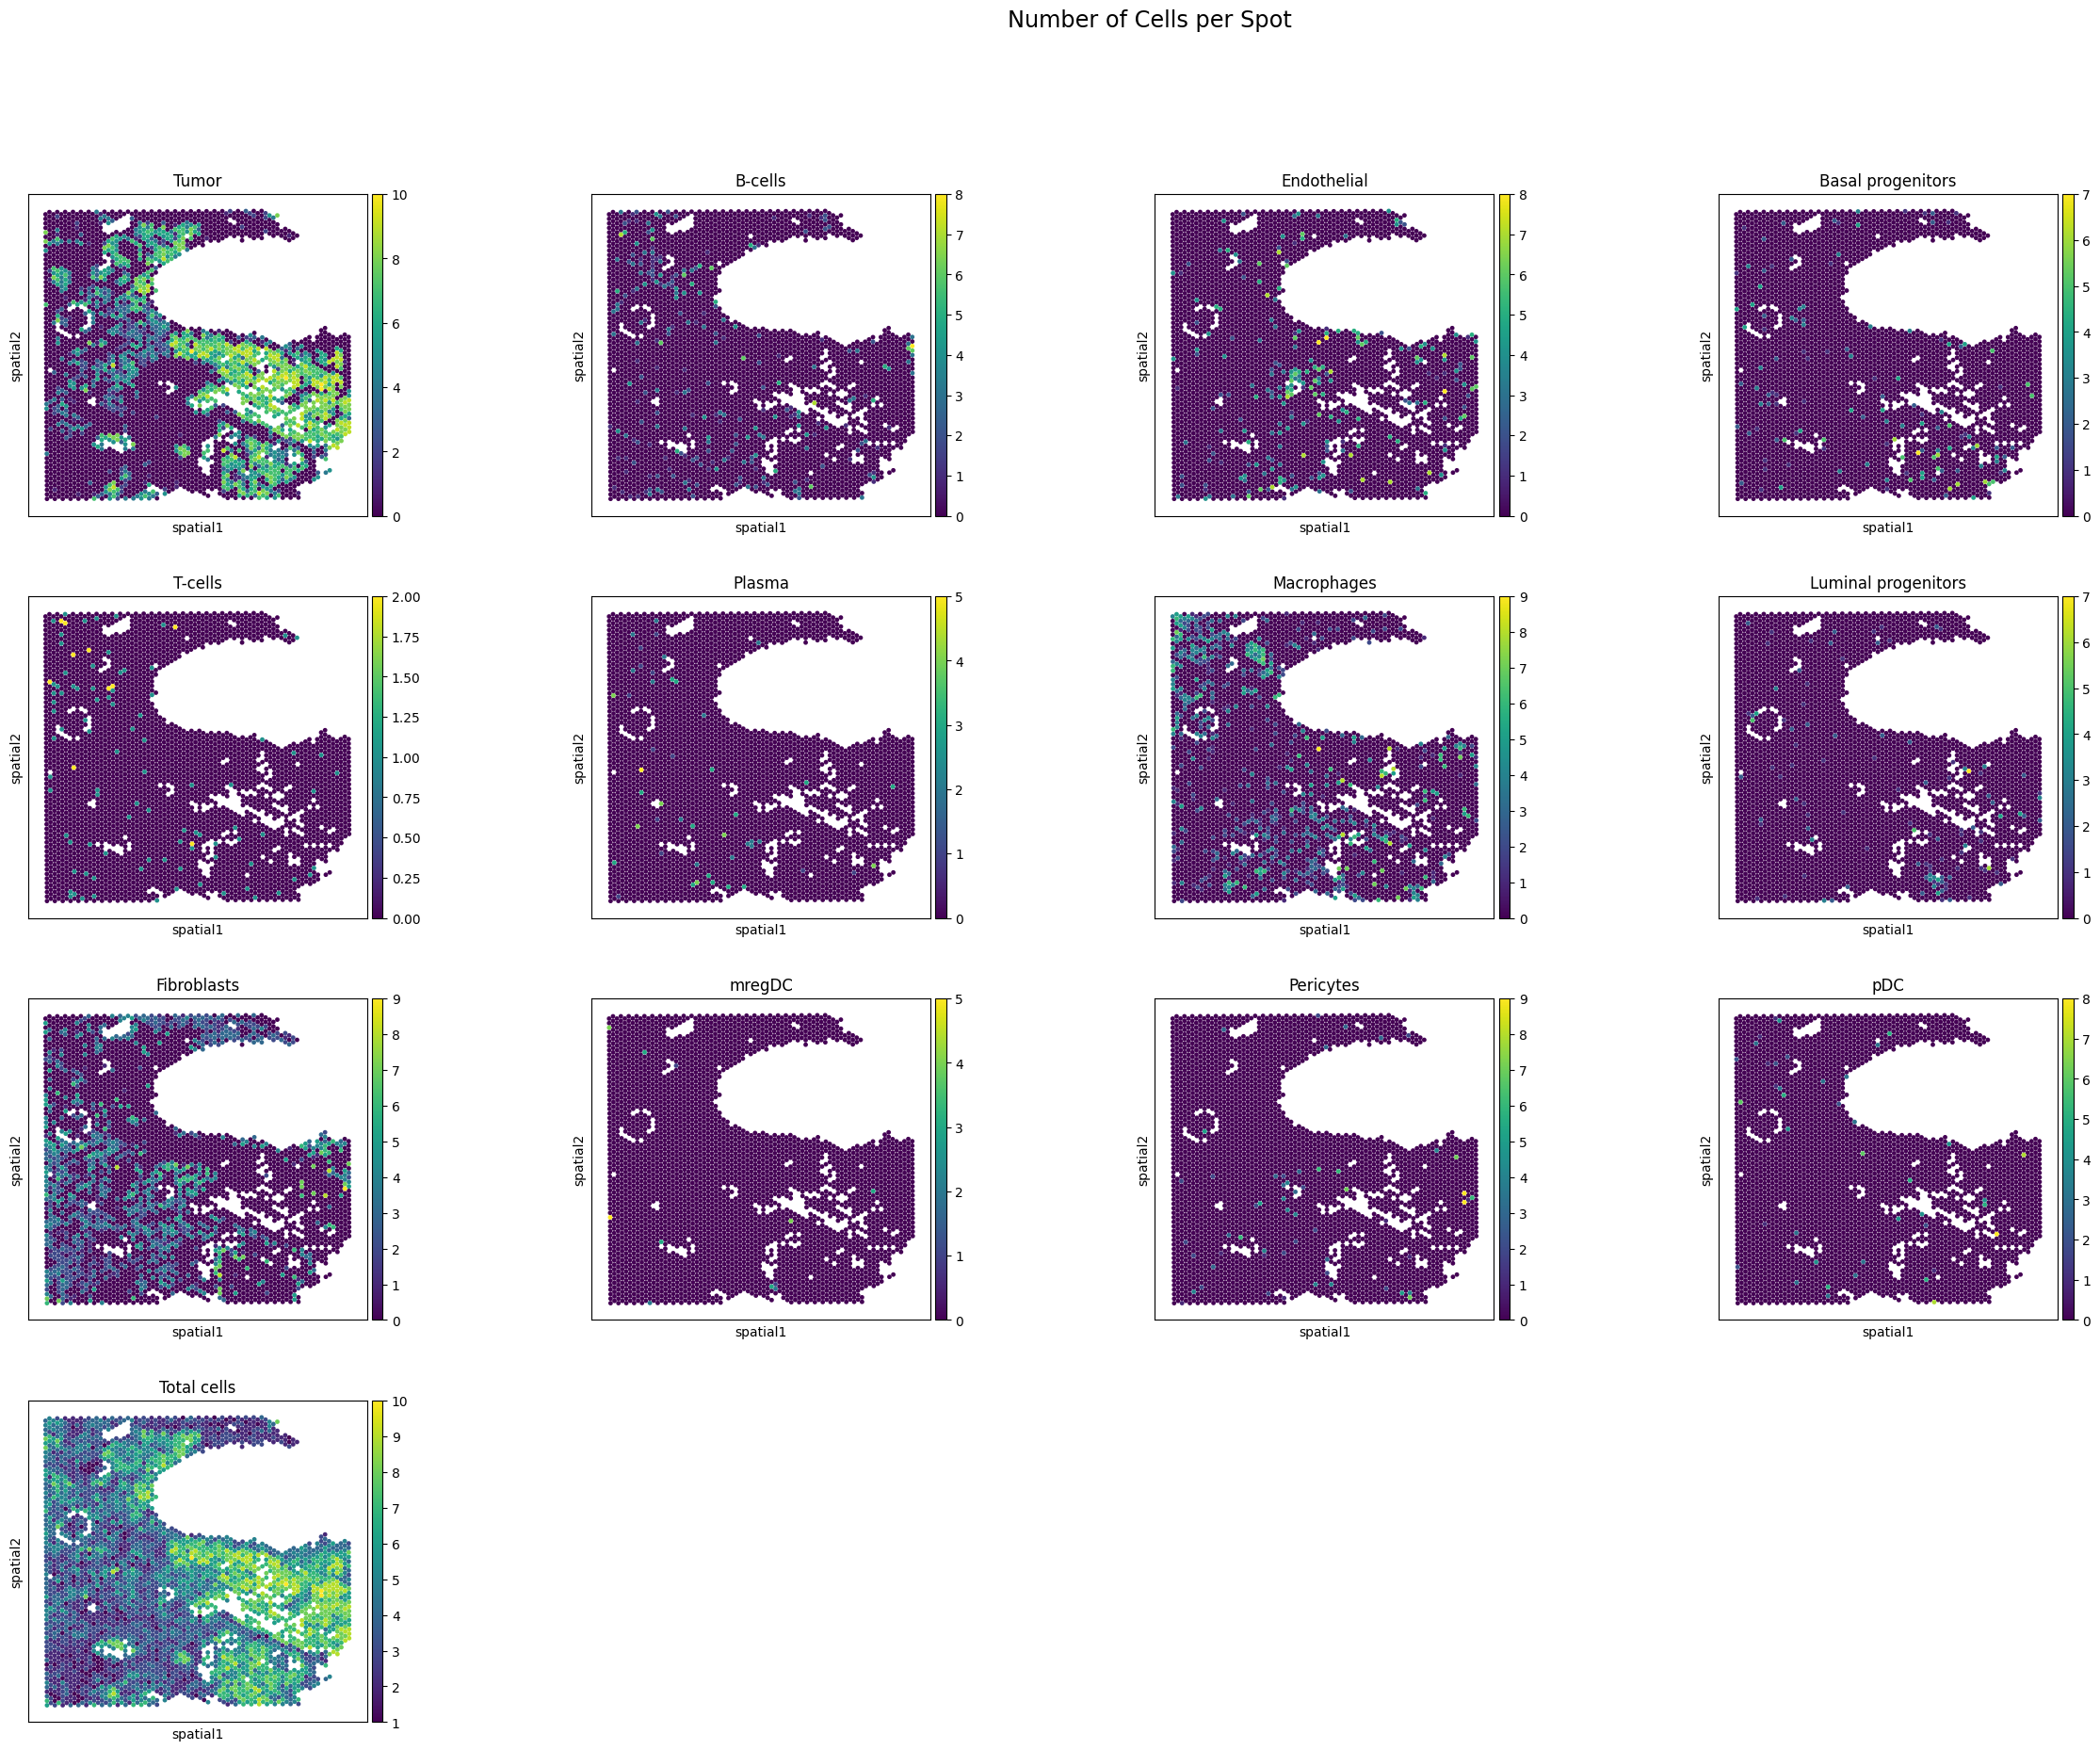

In [24]:
# plot and save figure
celltype_assign_by_spot = sc.pl.spatial(adata, color=['Tumor', 'B-cells', 'Endothelial', 'Basal progenitors', 'T-cells', 
                                                      'Plasma','Macrophages', 'Luminal progenitors', 'Fibroblasts', 
                                                      'mregDC', 'Pericytes', 'pDC', 'Total cells'], alpha_img=0., 
                                        spot_size = 250, show = False)

plt.suptitle('Number of Cells per Spot', fontsize = 'xx-large', fontweight = 'medium')

# Save the figure
outpath = '/diskmnt/Projects/Users/winnie/data/subclone/analysis/HT397B1-S1H2Fs4U1Bp1/output_plots'
fig1 = os.path.join(outpath, 'celltype_assign_by_spot_scanpy.png')
plt.savefig(fig1, facecolor='w', bbox_inches='tight', dpi=500)

plt.show()

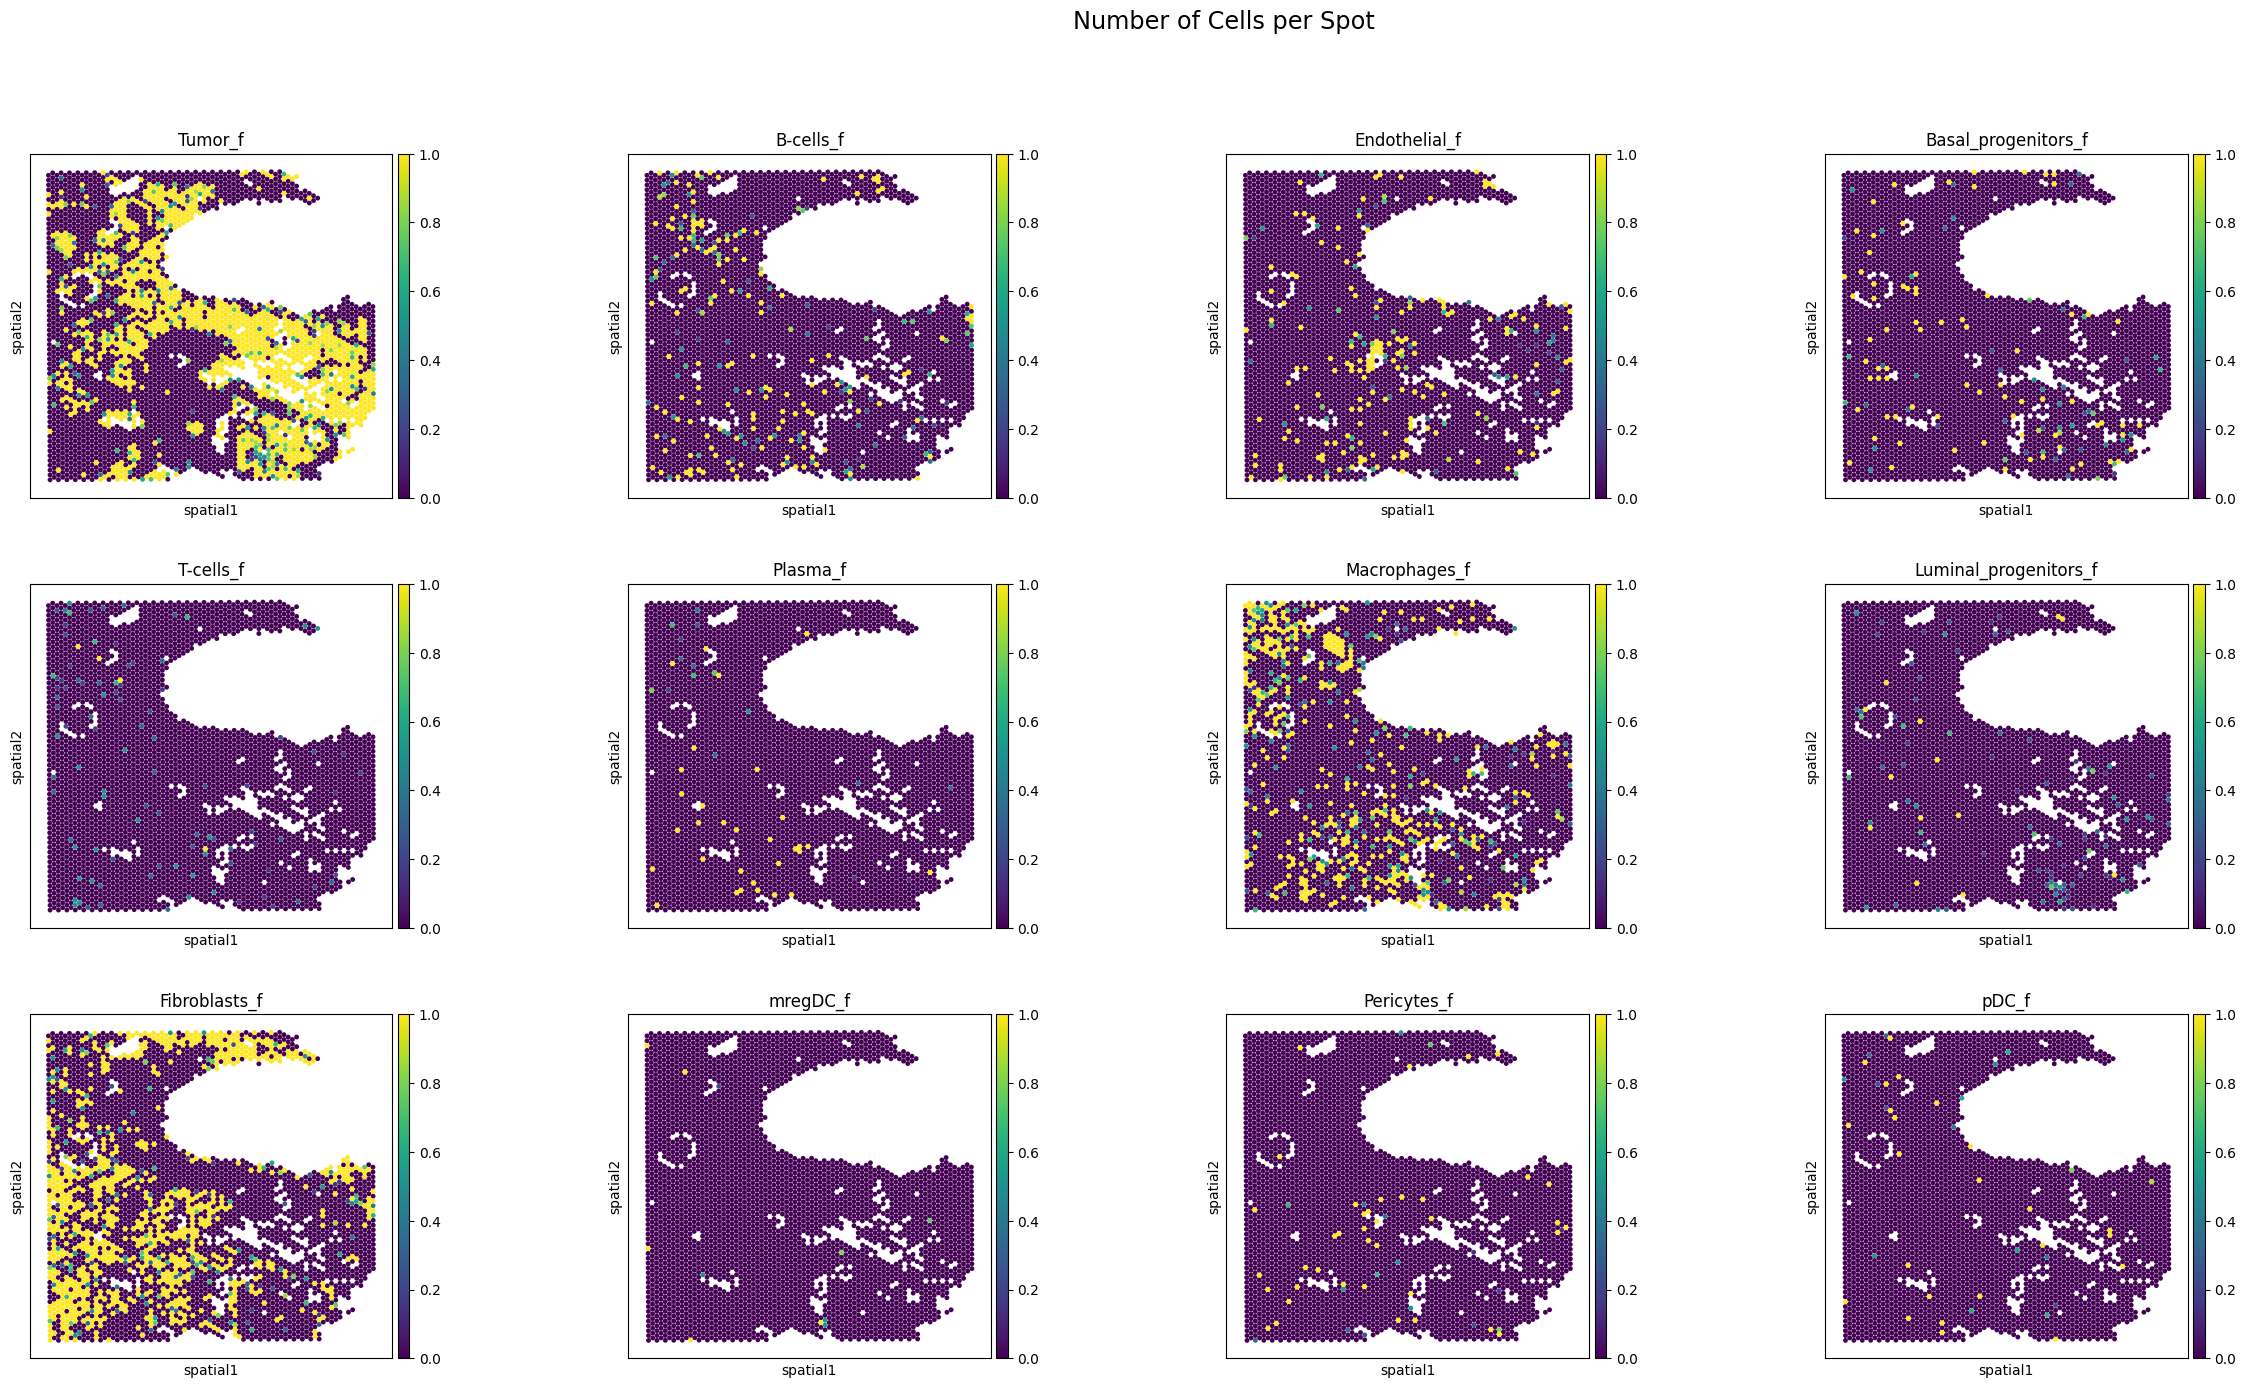

In [26]:
# plot and save figure
fractional_celltype_assign_by_spot = sc.pl.spatial(adata, color=['Tumor_f', 'B-cells_f', 'Endothelial_f', 'Basal_progenitors_f', 
                                                                 'T-cells_f', 'Plasma_f', 'Macrophages_f', 'Luminal_progenitors_f', 
                                                                 'Fibroblasts_f', 'mregDC_f', 'Pericytes_f', 'pDC_f'], 
                                                   alpha_img=0., spot_size = 250, show = False)

plt.suptitle('Number of Cells per Spot', fontsize = 'xx-large', fontweight = 'medium')

# Save the figure
fig2 = os.path.join(outpath, 'fractional_celltype_assign_by_spot_scanpy.png')
plt.savefig(fig2, facecolor='w', bbox_inches='tight', dpi=500)

plt.show()

Citation:
High-resolution alignment of single-cell and spatial transcriptomes with CytoSPACE (Nature Biotechnology 2023) Milad R. Vahid*, Erin L. Brown*, Chloé B. Steen*, Wubing Zhang, Hyun Soo Jeon, Minji Kang, Andrew J. Gentles, Aaron M. Newman. https://www.nature.com/articles/s41587-023-01697-9